In [1]:
## IMPORT LIBRARIES
# General libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
import pandas as pd
import os
from natsort import natsorted
import sys
import re
from matplotlib import gridspec
import math
from collections import Counter

# Tensorflow / Keras
import tensorflow as tf
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from tensorflow.keras.models import Sequential # for creating a linear stack of layers for our Neural Network
import tensorflow.python.keras.metrics 
from tensorflow.keras import Input # for instantiating a keras tensor
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Activation, Dropout # for creating regular densely-connected NN layers.
from tensorflow.keras.callbacks import History
from tensorflow.keras.models import save_model

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
#from imblearn.under_sampling import RandomUnderSampler

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
##dimesnionality reduction or feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif , chi2

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
#from pyts.image import RecurrencePlot
#from PIL import Image
#from matplotlib import cm
#from ripser import Rips
#from persim import PersImage
#from persim import PersistenceImager
%matplotlib inline

# Feature importance
import shap
#import eli5
#from eli5.sklearn import PermutationImportance

# prepare target
#def prepare_targets(y_train, y_test):
#    #le = LabelEncoder();
#    
#    le = LabelBinarizer();
#    le.fit(y_train)
#    y_train_enc = le.transform(y_train)
#    y_test_enc = le.transform(y_test)
#    return y_train_enc, y_test_enc

def prepare_targets(df):
    df_copy = df.copy()
    for i in df.index:
        if df_copy.loc[i] == 'CTPR16_100mV':
            df_copy.loc[i] = 0
        if df_copy.loc[i] == 'Control_100mV':
            df_copy.loc[i] = 1
    return df_copy.to_numpy()

##seed for reproducibility
seed_value = 1
# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

#set_random_seed(101)

######ipython kernel install --user --name=tf-env #####

Tensorflow/Keras: 2.9.0
pandas: 1.4.4
numpy: 1.22.3
sklearn: 0.23.2
plotly: 5.11.0


Train dev: [2, 3, 4, 5, 6, 7], test dev: [1], classes : ['Control_100mV', 'CTPR16_100mV'], loading and preparing dataset...
Train dev: [2, 3, 4, 5, 6, 7], test dev: [1], classes : ['Control_100mV', 'CTPR16_100mV'], running classification...


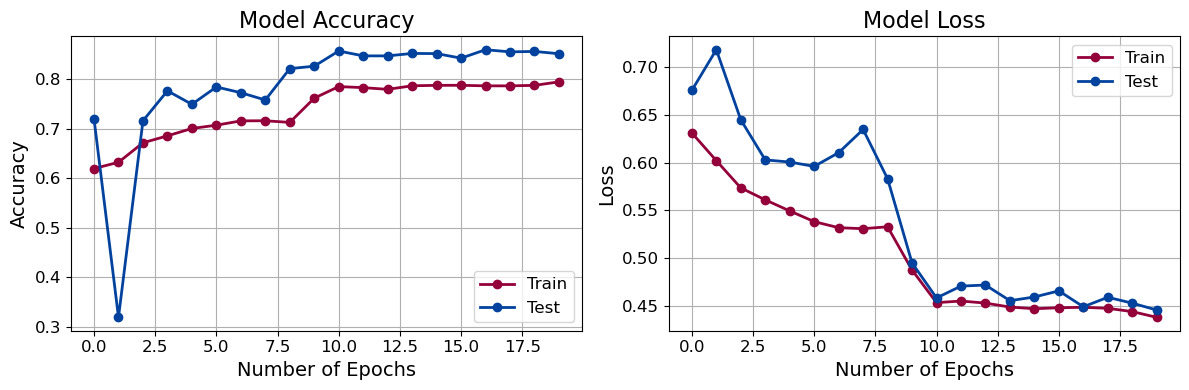

108/108 [==============================] - 1s 5ms/step


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      8914
           1       0.90      0.87      0.88     11720

    accuracy                           0.87     20634
   macro avg       0.87      0.87      0.87     20634
weighted avg       0.87      0.87      0.87     20634

[[ 7758  1156]
 [ 1543 10177]]

Train Accuracy: 0.869196
Train Precision: 0.870395
Train Recall: 0.869196
Train F1 score: 0.869488
Train Cohens kappa: 0.734842
Train ROC AUC: 0.936110
---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2354
           1       0.75      0.80      0.77      1102

    accuracy                           0.85      3456
   macro avg       0.83      0.84      0.83      3456
weighted avg       0.85      0.85      0.85      3456

[[2059  2

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


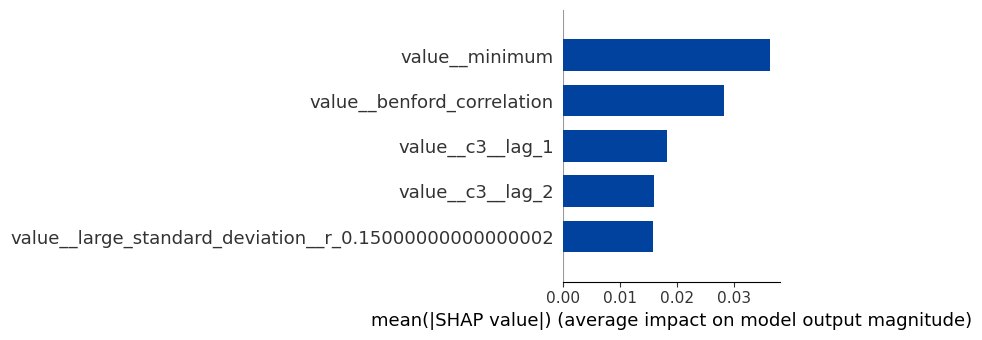

<Figure size 640x480 with 0 Axes>

Train dev: [1, 3, 4, 5, 6, 7], test dev: [2], classes : ['Control_100mV', 'CTPR16_100mV'], loading and preparing dataset...
Train dev: [1, 3, 4, 5, 6, 7], test dev: [2], classes : ['Control_100mV', 'CTPR16_100mV'], running classification...


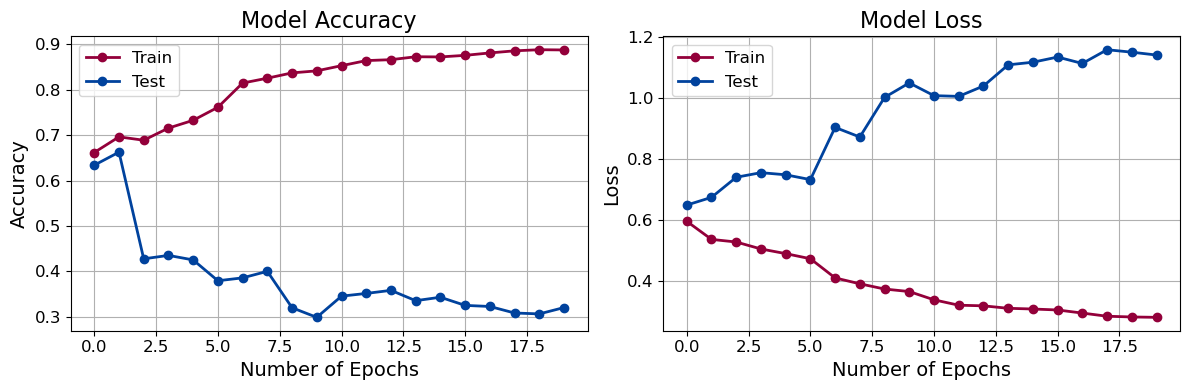

79/79 [==============================] - 0s 5ms/step


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10567
           1       0.95      0.91      0.93     11019

    accuracy                           0.93     21586
   macro avg       0.93      0.93      0.93     21586
weighted avg       0.93      0.93      0.93     21586

[[10005   562]
 [  977 10042]]

Train Accuracy: 0.928704
Train Precision: 0.929395
Train Recall: 0.928704
Train F1 score: 0.928706
Train Cohens kappa: 0.857460
Train ROC AUC: 0.973132
---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.28      0.92      0.43       701
           1       0.74      0.09      0.15      1803

    accuracy                           0.32      2504
   macro avg       0.51      0.50      0.29      2504
weighted avg       0.61      0.32      0.23      2504

[[ 646   55

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


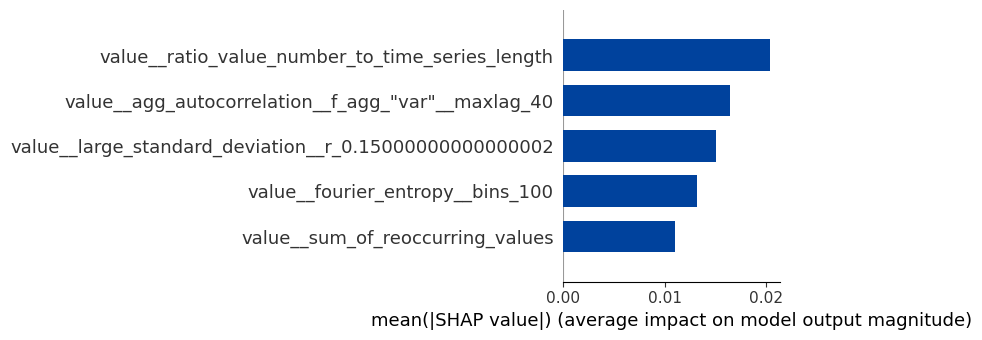

<Figure size 640x480 with 0 Axes>

Train dev: [1, 2, 4, 5, 6, 7], test dev: [3], classes : ['Control_100mV', 'CTPR16_100mV'], loading and preparing dataset...
Train dev: [1, 2, 4, 5, 6, 7], test dev: [3], classes : ['Control_100mV', 'CTPR16_100mV'], running classification...


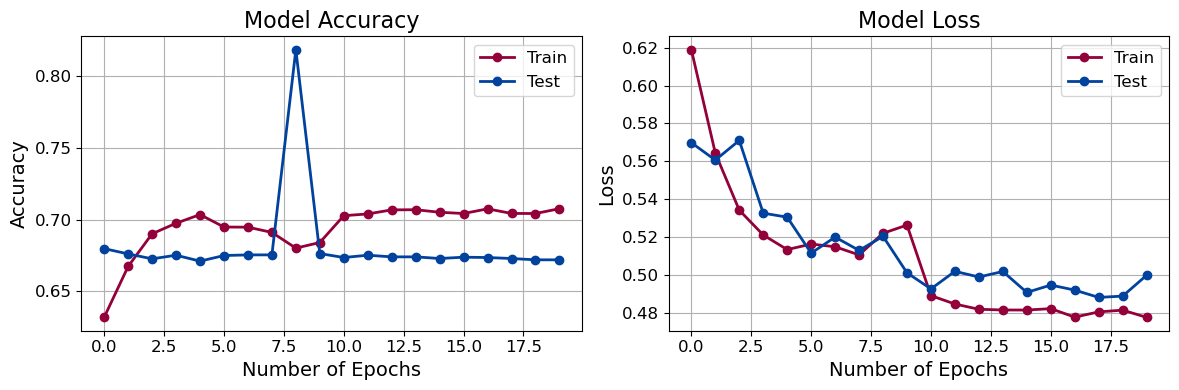

137/137 [==============================] - 1s 4ms/step


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.94      0.53      0.67      9866
           1       0.67      0.96      0.79      9867

    accuracy                           0.74     19733
   macro avg       0.80      0.74      0.73     19733
weighted avg       0.80      0.74      0.73     19733

[[5187 4679]
 [ 359 9508]]

Train Accuracy: 0.744692
Train Precision: 0.802723
Train Recall: 0.744692
Train F1 score: 0.731836
Train Cohens kappa: 0.489372
Train ROC AUC: 0.900940
---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.25      0.01      0.02      1402
           1       0.68      0.99      0.80      2955

    accuracy                           0.67      4357
   macro avg       0.46      0.50      0.41      4357
weighted avg       0.54      0.67      0.55      4357

[[  13 1389]


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


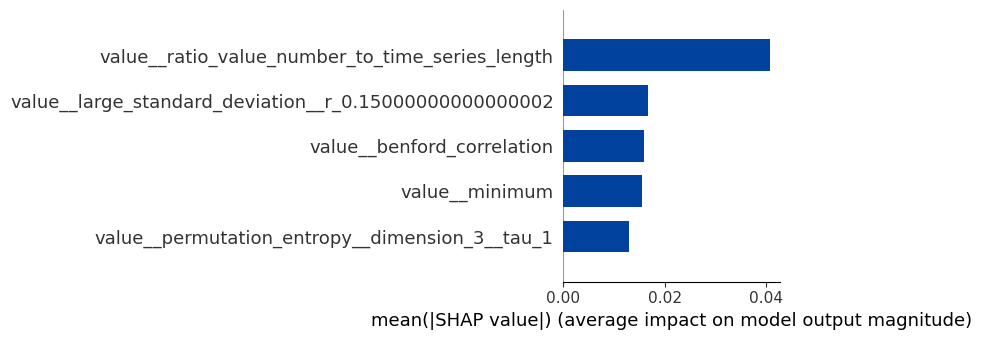

<Figure size 640x480 with 0 Axes>

Train dev: [1, 2, 3, 5, 6, 7], test dev: [4], classes : ['Control_100mV', 'CTPR16_100mV'], loading and preparing dataset...
Train dev: [1, 2, 3, 5, 6, 7], test dev: [4], classes : ['Control_100mV', 'CTPR16_100mV'], running classification...


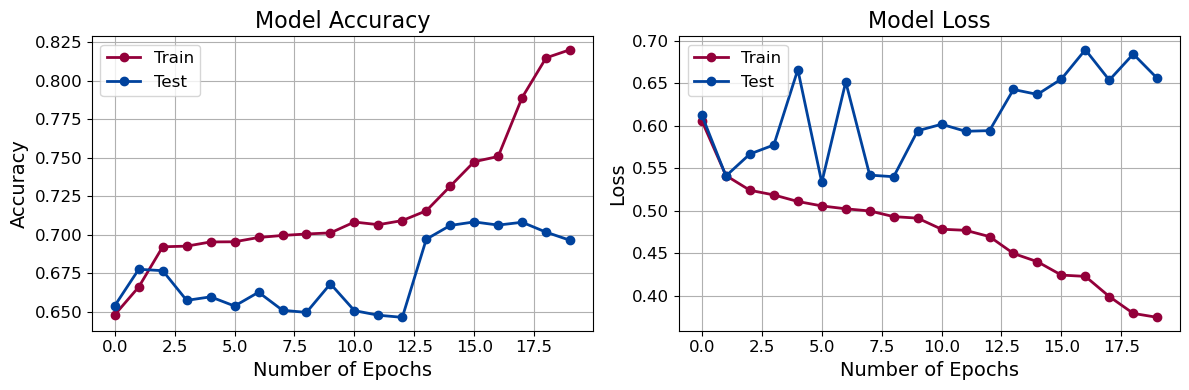

137/137 [==============================] - 1s 4ms/step


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      9866
           1       0.92      0.87      0.90      9867

    accuracy                           0.90     19733
   macro avg       0.90      0.90      0.90     19733
weighted avg       0.90      0.90      0.90     19733

[[9164  702]
 [1293 8574]]

Train Accuracy: 0.898900
Train Precision: 0.900337
Train Recall: 0.898900
Train F1 score: 0.898810
Train Cohens kappa: 0.797801
Train ROC AUC: 0.955567
---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.57      0.22      0.31      1402
           1       0.71      0.92      0.81      2955

    accuracy                           0.70      4357
   macro avg       0.64      0.57      0.56      4357
weighted avg       0.67      0.70      0.65      4357

[[ 303 1099]


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


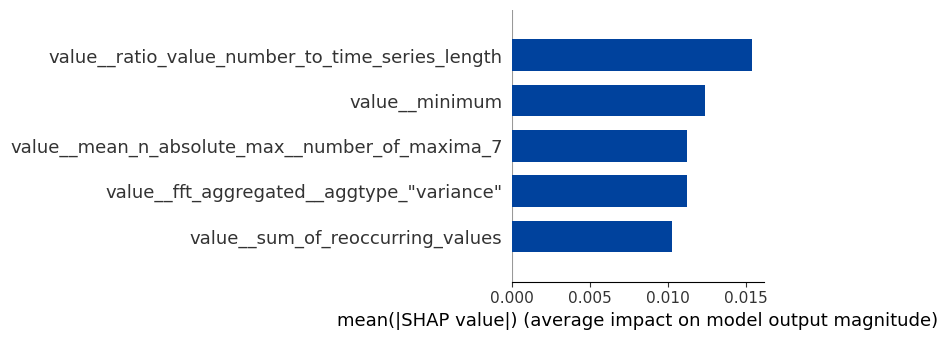

<Figure size 640x480 with 0 Axes>

Train dev: [1, 2, 3, 4, 6, 7], test dev: [5], classes : ['Control_100mV', 'CTPR16_100mV'], loading and preparing dataset...
Train dev: [1, 2, 3, 4, 6, 7], test dev: [5], classes : ['Control_100mV', 'CTPR16_100mV'], running classification...


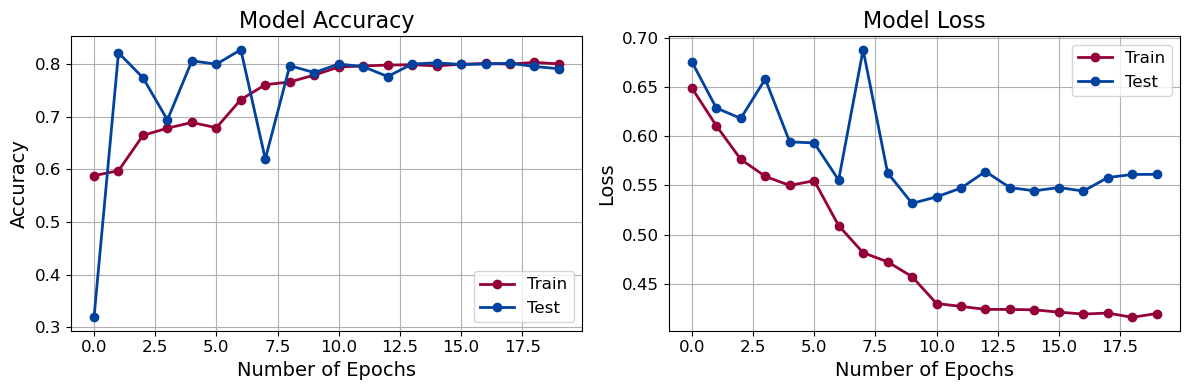

108/108 [==============================] - 1s 5ms/step


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      8914
           1       0.96      0.76      0.85     11720

    accuracy                           0.85     20634
   macro avg       0.86      0.86      0.85     20634
weighted avg       0.87      0.85      0.85     20634

[[8536  378]
 [2774 8946]]

Train Accuracy: 0.847242
Train Precision: 0.871015
Train Recall: 0.847242
Train F1 score: 0.847595
Train Cohens kappa: 0.698432
Train ROC AUC: 0.937567
---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2354
           1       0.66      0.72      0.69      1102

    accuracy                           0.79      3456
   macro avg       0.76      0.77      0.77      3456
weighted avg       0.80      0.79      0.79      3456

[[1939  415]


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


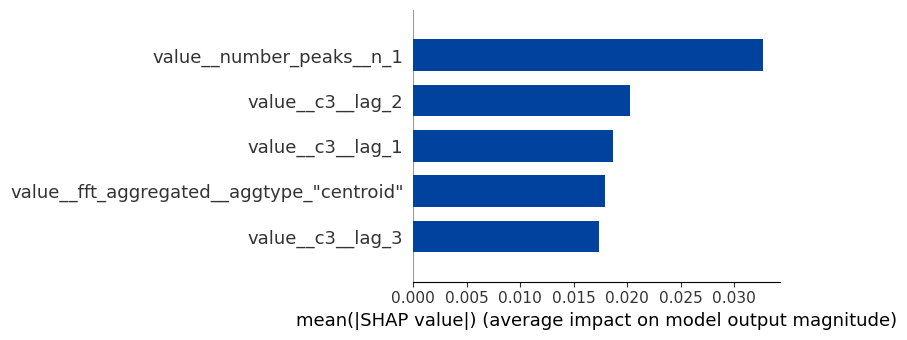

<Figure size 640x480 with 0 Axes>

Train dev: [1, 2, 3, 4, 5, 7], test dev: [6], classes : ['Control_100mV', 'CTPR16_100mV'], loading and preparing dataset...
Train dev: [1, 2, 3, 4, 5, 7], test dev: [6], classes : ['Control_100mV', 'CTPR16_100mV'], running classification...


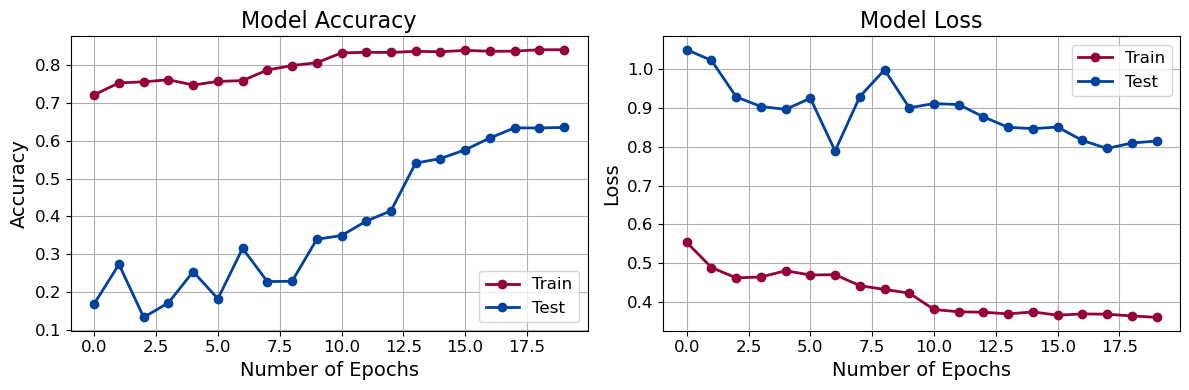

108/108 [==============================] - 0s 4ms/step


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.74      0.94      0.82      8914
           1       0.94      0.75      0.83     11720

    accuracy                           0.83     20634
   macro avg       0.84      0.84      0.83     20634
weighted avg       0.85      0.83      0.83     20634

[[8345  569]
 [2975 8745]]

Train Accuracy: 0.828245
Train Precision: 0.851766
Train Recall: 0.828245
Train F1 score: 0.828633
Train Cohens kappa: 0.660971
Train ROC AUC: 0.938702
---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      2354
           1       0.18      0.04      0.07      1102

    accuracy                           0.64      3456
   macro avg       0.43      0.48      0.42      3456
weighted avg       0.52      0.64      0.55      3456

[[2150  204]


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


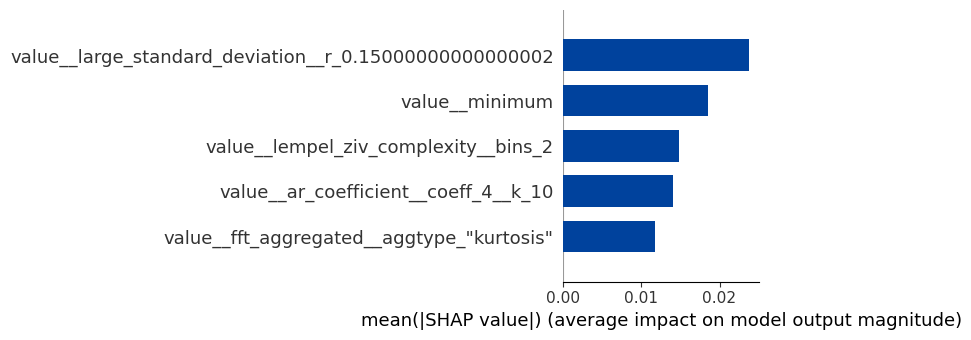

<Figure size 640x480 with 0 Axes>

Train dev: [1, 2, 3, 4, 5, 6], test dev: [7], classes : ['Control_100mV', 'CTPR16_100mV'], loading and preparing dataset...
Train dev: [1, 2, 3, 4, 5, 6], test dev: [7], classes : ['Control_100mV', 'CTPR16_100mV'], running classification...


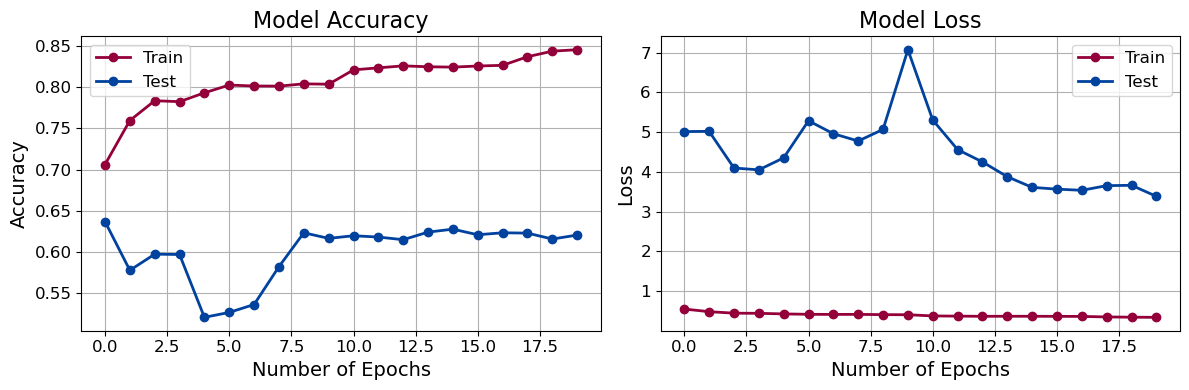

79/79 [==============================] - 0s 4ms/step


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     10567
           1       0.93      0.82      0.87     11019

    accuracy                           0.88     21586
   macro avg       0.88      0.88      0.88     21586
weighted avg       0.88      0.88      0.87     21586

[[9874  693]
 [2000 9019]]

Train Accuracy: 0.875243
Train Precision: 0.881121
Train Recall: 0.875243
Train F1 score: 0.874944
Train Cohens kappa: 0.751009
Train ROC AUC: 0.956451
---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       701
           1       0.69      0.86      0.77      1803

    accuracy                           0.62      2504
   macro avg       0.34      0.43      0.38      2504
weighted avg       0.50      0.62      0.55      2504

[[   0  701]
 [

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


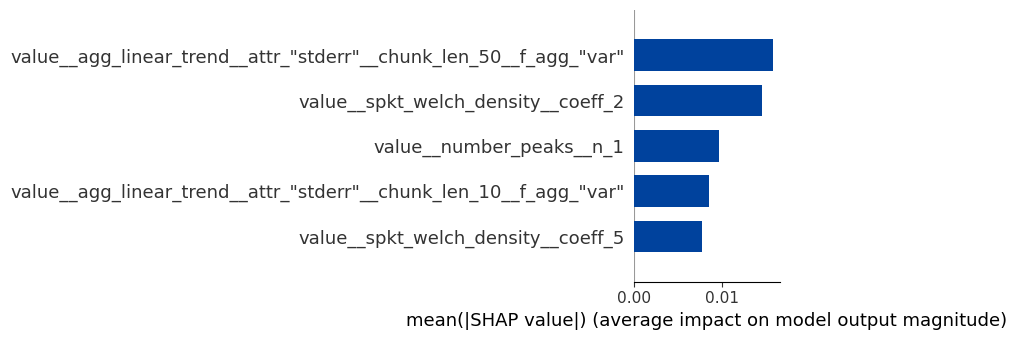

<Figure size 640x480 with 0 Axes>

In [2]:
##list_train_dev = [[1,3,4,5,6,7],[1,2,4,5,6,7],[1,2,3,4,6,7]]

list_test_dev = [[1],[2],[3],[4],[5],[6],[7]] #,[8],[13]] #[[1],[2],[3],[4],[5],[6],[7],[11],[8],[13]] 

all_num =[1,2,3,4,5,6,7] #,8,]

#for j in range(len(list_test_dev)):
#    for i in range(len(list_test_dev)):
#        if i != j:
#            dev_num_train = all_num.copy()
#            dev_num_test = list_test_dev[j] + list_test_dev[i]
#            dev_num_train.remove(list_test_dev[j][0])
#            dev_num_train.remove(list_test_dev[i][0])
#    #print(all_num)
    
for j in range(len(list_test_dev)):
#for j in range(5,6):
    dev_num_train = all_num.copy()
    dev_num_test = list_test_dev[j]
    dev_num_train.remove(list_test_dev[j][0])
    #print(all_num)
    
    conditions = ['Control_100mV','CTPR16_100mV']

    ##### Select data for modeling
    
    print(f'Train dev: {dev_num_train}, test dev: {dev_num_test}, classes : {conditions}, loading and preparing dataset...')

    train_data = pd.concat(map(pd.read_csv,[f'./dev_{dev_num_train[0]}_{conditions[0]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[0]}_{conditions[1]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[1]}_{conditions[0]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[1]}_{conditions[1]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[2]}_{conditions[0]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[2]}_{conditions[1]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[3]}_{conditions[0]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[3]}_{conditions[1]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[4]}_{conditions[0]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[4]}_{conditions[1]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[5]}_{conditions[0]}_all_extracted_features.csv',
                                            f'./dev_{dev_num_train[5]}_{conditions[1]}_all_extracted_features.csv',
                                            #f'./dev_{dev_num_train[6]}_{conditions[0]}_all_extracted_features.csv',
                                            #f'./dev_{dev_num_train[6]}_{conditions[1]}_all_extracted_features.csv',
                                            #f'./dev_{dev_num_train[7]}_{conditions[0]}_all_extracted_features.csv',
                                            #f'./dev_{dev_num_train[7]}_{conditions[1]}_all_extracted_features.csv',
                                            #f'./dev_{dev_num_train[8]}_{conditions[0]}_all_extracted_features.csv',
                                            #f'./dev_{dev_num_train[8]}_{conditions[1]}_all_extracted_features.csv'
                                           ]),ignore_index=True).sample(frac=1,random_state=seed_value)
    
    #print(train_data.info)
    
    
    test_data = pd.concat(map(pd.read_csv,[f'./dev_{dev_num_test[0]}_{conditions[0]}_all_extracted_features.csv',
                                           f'./dev_{dev_num_test[0]}_{conditions[1]}_all_extracted_features.csv',
                                           #f'./dev_{dev_num_test[1]}_{conditions[0]}_all_extracted_features.csv',
                                           #f'./dev_{dev_num_test[1]}_{conditions[1]}_all_extracted_features.csv',
                                           #f'./dev_{dev_num_test[2]}_{conditions[0]}_all_extracted_features.csv',
                                           #f'./dev_{dev_num_test[2]}_{conditions[1]}_all_extracted_features.csv'
                                          ]),ignore_index=True).sample(frac=1,random_state=seed_value)
    #print(test_data.info)
    
    train_nan_cols = [i for i in train_data.columns if train_data[i].isnull().any()]
    test_nan_cols = [i for i in test_data.columns if test_data[i].isnull().any()]
    #print(len(train_nan_cols))
    #print(len(test_nan_cols))
    
    nan_cols = list(set(train_nan_cols+ test_nan_cols))
    #print(len(nan_cols))
    
    ##### Create training and testing samples
    train_data_wo_nan = train_data.drop(nan_cols,axis=1).reset_index()
    #print('Y TRAIN CLASS NUMBERS:')
    #print(train_data_wo_nan['label'].value_counts())
    
    test_data_wo_nan = test_data.drop(nan_cols,axis=1).reset_index()
    #print('Y TEST CLASS NUMBERS:')
    #print(test_data_wo_nan['label'].value_counts())
    
    #X = dataset.iloc[:,:len(train_data)-2]
    #y = dataset.iloc[:,len(train_data)-1:len(train_data)]
    
    X_train = train_data_wo_nan.drop(['index','label','dev_label_id'],axis=1)
    X_test = test_data_wo_nan.drop(['index','label','dev_label_id'],axis=1)
    #print(X_train.head())
    #print('X TRAIN',X_train.shape)
    #print('X TEST',X_test.shape)
    
    y_train = train_data_wo_nan['label']
    y_test = test_data_wo_nan['label']
    
    #print('Y TRAIN',y_train.shape)
    #print('Y TEST',y_test.shape)
    
    ##### Data Scaling
    
    scaler = MinMaxScaler()  #StandardScaler, MinMaxScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #print('X TRAIN SCALED',X_train_scaled.shape)
    #print('X TEST SCALED',X_test_scaled.shape)


    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns.tolist())
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_train.columns.tolist())
    #print(X_train_scaled_df.head())
    
    # prepare target labels as 0 or 1
    #y_train_enc = pd.get_dummies(y_train)
    #y_test_enc = pd.get_dummies(y_test)
    #y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
    y_train_enc = prepare_targets(y_train).astype('int')
    y_test_enc = prepare_targets(y_test).astype('int')
    #print(type(y_train_enc), y_train_enc)
    
    num_top_feat = 700
    
    # Define feature selection
    fs = SelectKBest(score_func=chi2, k=num_top_feat) 
    ### apply feature selection on scaled data
    X_train_selected = fs.fit_transform(X_train_scaled, y_train_enc)
    #print('X_train_selected shape :', X_train_selected.shape)
    ##X_test_selected = fs.transform(X_test_scaled)
    ##print(X_test_selected.shape)
    
    # Get columns to keep and create new dataframe with those only
    cols = fs.get_support(indices=True)
    X_train_selected_df = X_train_scaled_df.iloc[:,cols]
    X_test_selected_df = X_test_scaled_df.iloc[:,cols]
    #print(X_train_selected_df.head())
    print(f'Train dev: {dev_num_train}, test dev: {dev_num_test}, classes : {conditions}, running classification...')

    ##hyperparamters:
    
    neuron_units = 1024
    batch_size = 32
    epochs = 20
    
    initial_learning_rate = 0.001
    def lr_step_decay(epoch, lr):
        drop_rate = 0.1
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    
    #early_stop = EarlyStopping(monitor='val_Accuracy', mode='max', verbose=1, patience=3,restore_best_weights=True)
    
    #initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
    
    ##### Step 4 - Specify the structure of a Neural Network
    
    model = Sequential(name=f"Model-with-{num_top_feat}-Input") # Model
    model.add(Input(shape=(777,),name="Input-layer"))    
    model.add(Dense(neuron_units,activation='relu', name="Hidden-layer-1"))
    model.add(Dropout(0.4))
    model.add(Dense(neuron_units,activation='relu', name="Hidden-layer-2"))
    model.add(Dropout(0.4))
    model.add(Dense(neuron_units,activation='relu', name="Hidden-layer-3"))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))
    
    ##### Step 5 - Compile keras model
    
    opt = keras.optimizers.Adam(learning_rate=initial_learning_rate) #SGD,Adam
    
    model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=['Accuracy','Precision', 'Recall'], 
                  loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None)
    
    ##### Step 6 - Fit keras model on the dataset
    
    model.fit(X_train_scaled_df, y_train_enc, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.0,
              validation_data=(X_test_scaled_df, y_test_enc), shuffle=False, class_weight=None, #{0:0.47 , 1:0.53},
              sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, 
              callbacks=[LearningRateScheduler(lr_step_decay, verbose=0)]
             )
    
    ##### Step 7 - Use model to make predictions
    
    #model_loss = pd.DataFrame()
    # list all data in history
    #print(model.history.history.keys())
    # summarize history for accuracy   
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
    ax1.plot(model.history.history['Accuracy'],color='#93003a',marker = 'o',linewidth=2)
    ax1.plot(model.history.history['val_Accuracy'],color='#00429d',marker = 'o',linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=16)
    ax1.set_ylabel('Accuracy', fontsize=14)
    ax1.set_xlabel('Number of Epochs', fontsize=14)
    ax1.grid(True)
    ax1.legend(['Train', 'Test'], loc='best',fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    # summarize history for loss
    ax2.plot(model.history.history['loss'],color='#93003a',marker = 'o',linewidth=2)
    ax2.plot(model.history.history['val_loss'],color='#00429d',marker = 'o',linewidth=2)
    ax2.set_title('Model Loss', fontsize=16)
    ax2.set_ylabel('Loss', fontsize=14)
    ax2.set_xlabel('Number of Epochs', fontsize=14)
    ax2.grid(True)
    ax2.legend(['Train', 'Test'], loc='best',fontsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    fig.savefig(f'test_{dev_num_test}_train_{dev_num_train}.png', dpi=300)
    plt.show()
    plt.close()
    
    ##### Step 8 - Use model to make predictions
    
    # Predict class labels on training data
    pred_labels_tr = (model.predict(X_train_scaled_df) > 0.5).astype(int)
    
    # Predict class labels on a test data
    pred_labels_te = (model.predict(X_test_scaled_df) > 0.5).astype(int)

    # predict probabilities for test set
    pred_prob_tr = model.predict(X_train_scaled_df, verbose=0)

    # predict probabilities for test set
    pred_prob_te = model.predict(X_test_scaled_df, verbose=0)

    ##### Step 9 - Model Performance Summary
    
    print("")
    #print('-------------------- Model Summary --------------------')
    #model.summary() # print model summary
    #print("")
    #print('-------------------- Weights and Biases --------------------')
    #for layer in model.layers:
    #    print("Layer: ", layer.name) # print layer name
    #    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    #    print("  --Biases: ", layer.get_weights()[1]) # biases
    
    print("")    
    print('---------- Evaluation on Training Data ----------')
    print(classification_report(y_train_enc, pred_labels_tr))
    print(confusion_matrix(y_train_enc,pred_labels_tr))
    print("")
    # reduce to 1d array
    #yhat_probs = yhat_probs[:, 0]
    #yhat_classes = yhat_classes[:, 0]
     
    # accuracy: (tp + tn) / (p + n)
    train_accuracy = accuracy_score(y_train_enc, pred_labels_tr[:, 0])
    print('Train Accuracy: %f' % train_accuracy)
    
    # precision tp / (tp + fp)
    train_precision = precision_score(y_train_enc, pred_labels_tr[:, 0],average='weighted')
    print('Train Precision: %f' % train_precision)
    
    # recall: tp / (tp + fn)
    train_recall = recall_score(y_train_enc, pred_labels_tr[:, 0],average='weighted')
    print('Train Recall: %f' % train_recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    train_f1 = f1_score(y_train_enc, pred_labels_tr[:, 0],average='weighted')
    print('Train F1 score: %f' % train_f1)
     
    # kappa
    train_kappa = cohen_kappa_score(y_train_enc, pred_labels_tr[:, 0])
    print('Train Cohens kappa: %f' % train_kappa)
    
    # ROC AUC
    train_auc = roc_auc_score(y_train_enc, pred_prob_tr[:, 0],average='weighted')
    print('Train ROC AUC: %f' % train_auc)
    
    # confusion matrix
    #train_matrix = confusion_matrix(y_train_enc, pred_labels_tr[:, 0])
    #print(train_matrix)
    
    print('---------- Evaluation on Test Data ----------')
    print(classification_report(y_test_enc, pred_labels_te))
    print(confusion_matrix(y_test_enc,pred_labels_te))
    print("")
    
    # reduce to 1d array
    #yhat_probs = yhat_probs[:, 0]
    #yhat_classes = yhat_classes[:, 0]
     
    # accuracy: (tp + tn) / (p + n)
    test_accuracy = accuracy_score(y_test_enc, pred_labels_te[:, 0])
    print('Test Accuracy: %f' % test_accuracy)
    
    # precision tp / (tp + fp)
    test_precision = precision_score(y_test_enc, pred_labels_te[:, 0],average='weighted')
    print('Test Precision: %f' % test_precision)
    
    # recall: tp / (tp + fn)
    test_recall = recall_score(y_test_enc, pred_labels_te[:, 0],average='weighted')
    print('Test Recall: %f' % test_recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    test_f1 = f1_score(y_test_enc, pred_labels_te[:, 0],average='weighted')
    print('Test F1 score: %f' % test_f1)
     
    # kappa
    test_kappa = cohen_kappa_score(y_test_enc, pred_labels_te[:, 0])
    print('Test Cohens kappa: %f' % test_kappa)
    
    # ROC AUC
    test_auc = roc_auc_score(y_test_enc, pred_prob_te[:, 0],average='weighted')
    print('Test ROC AUC: %f' % test_auc)
    
    # confusion matrix
    #test_matrix = confusion_matrix(y_test_enc, pred_labels_te[:, 0])
    #print(test_matrix)
    
    #print(pred_labels_te.shape)
    #print(y_test_enc.shape)
    #print(y_test_enc)
    ##feature importance
    # select a set of background examples to take an expectation over
    # we use the first 1000 training examples as our background dataset to integrate over
    print(f'Train dev: {dev_num_train}, test dev: {dev_num_test}, classes : {conditions},top features...')
    
    background = X_train_scaled_df.values[np.random.choice(X_train_scaled_df.values.shape[0], 1000, replace=False)] 
    explainer = shap.DeepExplainer(model,background)
    
    # ...or pass tensors directly
    # explainer = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
    
    # explain the first 100 predictions
    # explaining each prediction requires 2 * background dataset size runs
    shap_values = explainer.shap_values(X_test_scaled_df.values[1:500])
    #print(shap_values)
    
    shap.initjs()
    shap.summary_plot(
        shap_values[0], 
        X_train_scaled_df.values,
        feature_names=X_train_scaled_df.columns.tolist(),
        max_display=5,
        plot_type='bar',title='Feature Importance',color='#00429d')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    #print(f'Train dev: {dev_num_train}, test dev: {dev_num_test}, classes : {conditions} ,saving model...')
    #save_model(model, f"./model_test_dev_{dev_num_test[0]}.h5")
    
    #### load and evaluate a saved model
    ##from tensorflow.keras.models import load_model
    #### load model
    ##model = load_model('model.h5')
    ### summarize model.
    ##model.summary()
    ### load dataset
    ### load test data and minmaxscale it
    ##X_test = 
    ##Y_test =  ##encode it 
    ### evaluate the model
    ##model.predict(X_test, Y_test, verbose=0) ##predict or evaluate
    train_pred = pd.DataFrame({'True': y_train_enc.tolist(), #[item for sublist in y_train_enc for item in sublist] ,
                               'Predicted': [item for sublist in pred_labels_tr for item in sublist]})
    
    test_pred = pd.DataFrame({'True': y_test_enc.tolist(), #[item for sublist in y_test_enc for item in sublist]  , 
                              'Predicted': [item for sublist in pred_labels_te for item in sublist]})
    
    train_analysis= train_data_wo_nan[['label','dev_label_id']].join(train_pred)
    #print('train data analysis', train_analysis.head())

    test_analysis = test_data_wo_nan[['label','dev_label_id']].join(test_pred)
    #print('test data analysis', test_analysis.head()) 